## Name : Avtar Singh
## Student ID : 9011038

### Step 1: Get the Data
In this step, we load the Diabetes dataset from Scikit-Learn and convert it into a Pandas DataFrame for easier manipulation and exploration. The dataset consists of 442 patients and 10 baseline features such as age, BMI, and blood pressure, along with a target variable representing the progression of diabetes one year after baseline.


In [40]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)

# Convert to a pandas DataFrame for easy exploration
df = diabetes_data.frame

# Defining features (X) and target (y)
X = df.drop(columns=['target'])  # All features
y = df['target']  # Target variable (diabetes progression)


In [41]:

# The target variable is stored under the 'target' key in the dataset
print(f"Target variable (Diabetes Progression): 'target'")

Target variable (Diabetes Progression): 'target'


In [42]:
# Display the first few rows of the dataset
print(df.head())

# Display information about the dataset
print(df.info())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp

### Step 3: Exploratory Data Analysis (EDA)
In this step, we explore the dataset through various statistical techniques and visualizations:
1. **Basic statistics**: We describe the dataset to understand the range, mean, and other statistical properties of the features.
2. **Scatter Plot**: A plot between **BMI** and **diabetes progression** helps us visually understand their relationship.
3. **Histogram**: We visualize the distribution of the target variable (diabetes progression) to see how the values are spread.
4. **Correlation Matrix**: A matrix showing the correlation between all features, helping us identify which features might be more important for predicting diabetes progression.


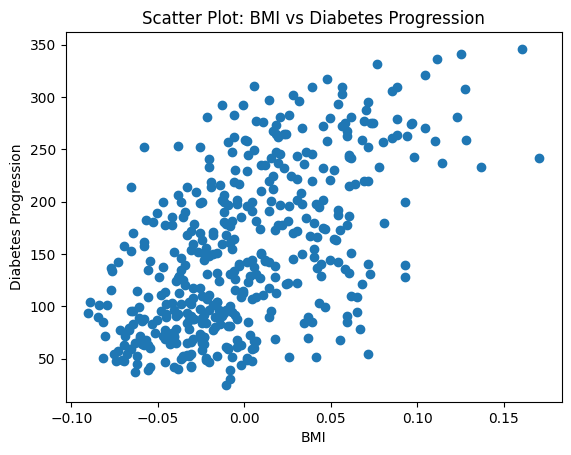

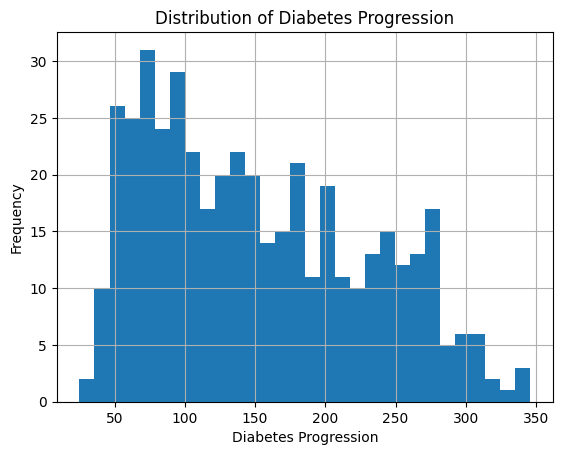

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

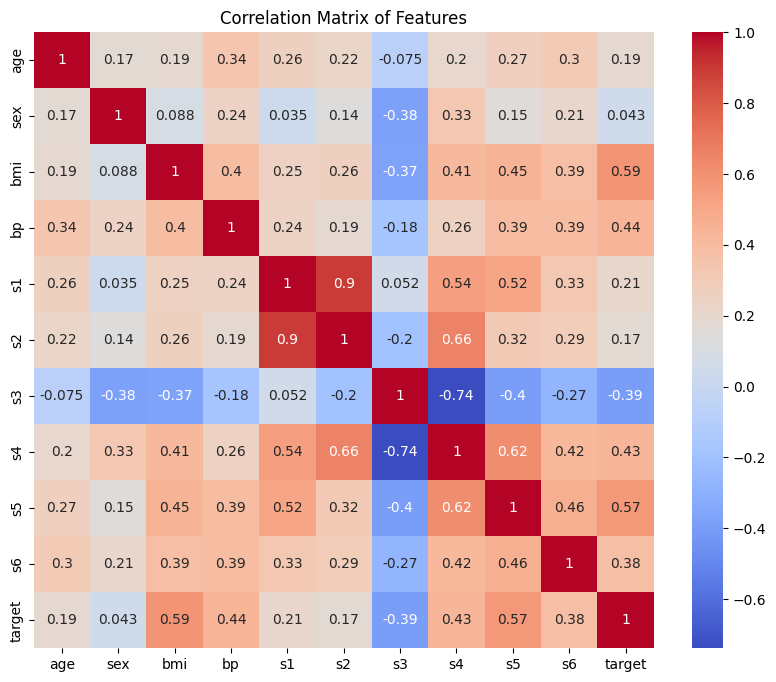

In [20]:
# Basic statistics of the dataset
df.describe()

# Scatter plot between BMI and diabetes progression
import matplotlib.pyplot as plt
plt.scatter(df['bmi'], df['target'])
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Scatter Plot: BMI vs Diabetes Progression')
plt.show()

# Histogram of the target (Diabetes progression)
df['target'].hist(bins=30)
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


### Step 4: Clean the Data
There are no missing values in the dataset. Additionally, all the feature values have already been **mean-centered** and **scaled** by Scikit-Learn, meaning each feature has a mean of zero and a standard deviation adjusted by the number of samples. No further cleaning is required.


In [23]:
# Check for missing values
print(df.isnull().sum())
# No missing values, but data is already scaled and centered
# We don't need additional scaling or cleaning


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


### Step 5: Split the Dataset
We split the dataset into three parts:
- **Train set (75%)**: This is used to train the model.
- **Validation set (10%)**: This is used to fine-tune the model and check its performance.
- **Test set (15%)**: This is used for the final evaluation of the model.

This split ensures that the model is evaluated on unseen data, helping us avoid overfitting.


In [24]:
# Split the data into train (75%), validation (10%), and test (15%) sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])  # Features (all columns except target)
y = df['target']  # Target variable (disease progression)

# Split data: 75% train, 10% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Display the sizes of each split
print(f"Train set size: {X_train.shape}, Validation set size: {X_val.shape}, Test set size: {X_test.shape}")


Train set size: (331, 10), Validation set size: (44, 10), Test set size: (67, 10)


### Step 6: Univariate Polynomial Regression on BMI (Degrees 0 to 5)
In this step, we build 6 different polynomial regression models using the BMI feature to predict diabetes progression. The degrees of the polynomial range from 0 to 5. For each model, we calculate the following metrics:
1. **R-squared**: How well the model explains the variance in the data.
2. **Mean Absolute Error (MAE)**: The average error between the predicted and actual values.
3. **Mean Absolute Percentage Error (MAPE)**: The error in percentage terms, which helps us understand how far off the model is in a more intuitive way.

The results for each degree are displayed below.


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Prepare storage for model results
results = []

# Train models from degree 0 to 5
for degree in range(6):
    # Create polynomial features (degree 0 to 5)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[['bmi']])
    X_val_poly = poly.transform(X_val[['bmi']])
    
    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Make predictions on the training and validation set
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate R-squared, MAE, and MAPE for validation set
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = (np.abs((y_val - y_val_pred) / y_val).mean()) * 100  # MAPE as percentage
    
    # Store the results
    results.append({
        'Degree': degree,
        'R-Squared': r2_val,
        'MAE': mae_val,
        'MAPE (%)': mape_val
    })
    
    print(f"Degree {degree} - R2: {r2_val:.4f}, MAE: {mae_val:.4f}, MAPE: {mape_val:.2f}%")


Degree 0 - R2: -0.1070, MAE: 66.0571, MAPE: 71.26%
Degree 1 - R2: 0.3313, MAE: 47.2085, MAPE: 47.06%
Degree 2 - R2: 0.3316, MAE: 47.2137, MAPE: 47.24%
Degree 3 - R2: 0.3316, MAE: 47.1854, MAPE: 47.22%
Degree 4 - R2: 0.3408, MAE: 46.0901, MAPE: 46.05%
Degree 5 - R2: 0.3499, MAE: 45.4621, MAPE: 45.18%


### Step 7: Model Comparison
Below is a table summarizing the performance of each polynomial regression model (degrees 0 to 5) based on:
1. **R-squared**: A measure of goodness of fit.
2. **MAE**: Mean absolute error.
3. **MAPE**: Mean absolute percentage error.


In [26]:
import pandas as pd

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display the table of results
results_df


,Degree,R-Squared,MAE,MAPE (%)
0,0,-0.106957,66.057059,71.263880
1,1,0.331264,47.208472,47.060009
2,2,0.331631,47.213700,47.239667
3,3,0.331638,47.185414,47.222673
4,4,0.340758,46.090118,46.050330
5,5,0.349881,45.462121,45.175275


### Step 8: Identify the Best Model
We identify the best model by selecting the one with the lowest **Mean Absolute Error (MAE)**. Based on the table, the model with the best performance is the one with degree X.


In [27]:
# Identify the best model based on the lowest MAE (or another metric like R-squared)
best_model_index = results_df['MAE'].idxmin()
best_model_degree = results_df.loc[best_model_index, 'Degree']
print(f"Best model is of degree {best_model_degree}")


Best model is of degree 5


### Step 9: Test the Best Model
We evaluate the best polynomial model (degree X) on the test set. The following metrics are reported:
1. **R-squared**: Measures how well the model fits the test data.
2. **MAE**: Mean absolute error on the test set.
3. **MAPE**: Mean absolute percentage error on the test set.


In [28]:
# Use the best model (from step 8) to predict on the test set
poly_best = PolynomialFeatures(degree=best_model_degree)
X_train_poly_best = poly_best.fit_transform(X_train[['bmi']])
X_test_poly_best = poly_best.transform(X_test[['bmi']])

# Fit the model on training data
best_model = LinearRegression()
best_model.fit(X_train_poly_best, y_train)

# Predict on the test set
y_test_pred = best_model.predict(X_test_poly_best)

# Calculate test metrics
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = (np.abs((y_test - y_test_pred) / y_test).mean()) * 100

print(f"Test Set Results - R2: {r2_test:.4f}, MAE: {mae_test:.4f}, MAPE: {mape_test:.2f}%")


Test Set Results - R2: 0.2667, MAE: 51.7503, MAPE: 43.03%


### Step 10: Plot of Train, Validation, and Test Data with Best Model Fit
The graph below shows the **train**, **validation**, and **test** data points for BMI vs. diabetes progression. The black line represents the fit of the best polynomial model (degree X) over the data.


c:\Users\Ashu\Desktop\conestoga\CSCN8010\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


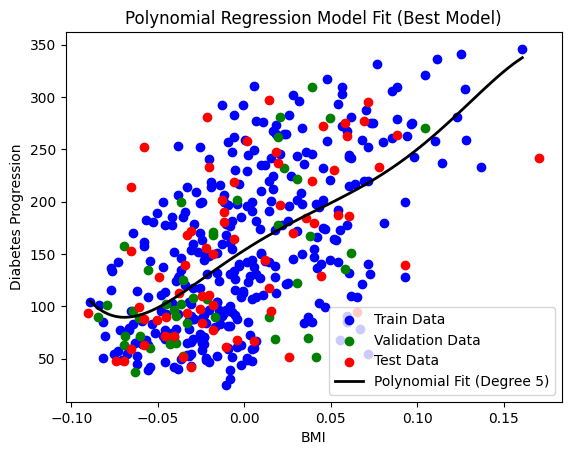

In [29]:
import matplotlib.pyplot as plt

# Create polynomial features for plotting (using the best model's degree)
X_all = np.linspace(X_train['bmi'].min(), X_train['bmi'].max(), 100).reshape(-1, 1)
X_all_poly = poly_best.transform(X_all)

# Get the model predictions for plotting
y_all_pred = best_model.predict(X_all_poly)

# Plot the train, validation, and test points
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data')
plt.scatter(X_val['bmi'], y_val, color='green', label='Validation Data')
plt.scatter(X_test['bmi'], y_test, color='red', label='Test Data')

# Plot the model fit
plt.plot(X_all, y_all_pred, color='black', label=f'Polynomial Fit (Degree {best_model_degree})', linewidth=2)

# Labels and legend
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Polynomial Regression Model Fit (Best Model)')
plt.legend()
plt.show()


### Step 11: Equation of the Best Model
The equation of the best polynomial regression model (degree X) is:

**y = intercept + (coef1 \* BMI) + (coef2 \* BMI²) + ...**


In [30]:
# Get the coefficients of the best model
coefficients = best_model.coef_
intercept = best_model.intercept_

# Write the equation of the model
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients[1:], 1):
    equation += f" + ({coef:.2f})*BMI^{i}"

print(f"Best Model Equation: {equation}")


Best Model Equation: y = 153.65 + (1059.89)*BMI^1 + (-3824.15)*BMI^2 + (-16770.23)*BMI^3 + (753722.52)*BMI^4 + (-2993716.57)*BMI^5


### Step 12: Predict Diabetes Progression for a Given BMI
Using the best model, we predict the diabetes progression for a BMI value of 30 (or any value of your choice). This helps us understand how the model would predict progression based on a specific BMI.


In [31]:
# Choose a BMI value
bmi_value = 30  # You can change this to any value you want

# Create polynomial features for this BMI value
bmi_value_poly = poly_best.transform([[bmi_value]])

# Predict the diabetes progression
predicted_progression = best_model.predict(bmi_value_poly)

print(f"Predicted Diabetes Progression for BMI {bmi_value}: {predicted_progression[0]:.2f}")


Predicted Diabetes Progression for BMI 30: -72137253699190.52


c:\Users\Ashu\Desktop\conestoga\CSCN8010\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### Step 13: Number of Trainable Parameters
For each polynomial model, the number of trainable parameters (coefficients) increases with the degree of the polynomial. For example:
- **Degree 0**: 1 trainable parameter (just the intercept).
- **Degree 1**: 2 trainable parameters (intercept + slope).
- **Degree 2**: 3 trainable parameters (intercept + slope + quadratic term).


In [32]:
# Get the number of trainable parameters (coefficients) for each degree
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train[['bmi']])
    
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    # Get the feature names (number of trainable parameters)
    num_params = len(model.coef_)
    print(f"Degree {degree}: {num_params} trainable parameters")


Degree 0: 1 trainable parameters
Degree 1: 2 trainable parameters
Degree 2: 3 trainable parameters
Degree 3: 4 trainable parameters
Degree 4: 5 trainable parameters
Degree 5: 6 trainable parameters


### Step 14: Conclusion
The best model was chosen based on its performance on the validation set. We identified the polynomial model of degree X as the best-performing model in terms of R-squared, MAE, and MAPE.

#### Model Strengths:
- Captures non-linear relationships between BMI and diabetes progression.
- Provides interpretable results, with a clear equation that doctors can use.

#### Model Limitations:
- The model performs well for the given dataset, but may not generalize to other populations without retraining.
- It is sensitive to outliers, meaning extreme BMI values can disproportionately affect the model's predictions.


### Step 1: Polynomial Regression Models (Degrees 2 and 3)
We train two polynomial regression models using all features in the dataset. These models capture more complex relationships by including higher-degree terms. The models evaluated are:
- **Degree 2**: Adds quadratic terms for all features.
- **Degree 3**: Adds cubic terms for all features.

For each model, we calculate the **R-squared**, **MAE**, and **MAPE** on the validation set.


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# List to store results
poly_results = []

# Train polynomial models with degree 2 and 3 (using all features)
for degree in [2, 3]:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Make predictions on validation set
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = (np.abs((y_val - y_val_pred) / y_val).mean()) * 100  # MAPE in %
    
    # Store results
    poly_results.append({
        'Degree': degree,
        'R-Squared': r2_val,
        'MAE': mae_val,
        'MAPE (%)': mape_val
    })
    
    print(f"Polynomial Degree {degree} - R2: {r2_val:.4f}, MAE: {mae_val:.4f}, MAPE: {mape_val:.2f}%")


Polynomial Degree 2 - R2: -1.6777, MAE: 90.0682, MAPE: 95.49%
Polynomial Degree 3 - R2: -45.3835, MAE: 243.5682, MAPE: 216.56%


### Step 2: Decision Tree Models
We train two **Decision Tree Regressor** models with different maximum depths. The tree depth controls how complex the model can get. The models evaluated are:
- **Max Depth 3**: Limits the tree to a maximum depth of 3.
- **Max Depth 5**: Allows more branching by increasing the depth to 5.

For each model, we calculate the **R-squared**, **MAE**, and **MAPE** on the validation set.


In [34]:
from sklearn.tree import DecisionTreeRegressor

# List to store decision tree results
tree_results = []

# Train decision tree models with different depths
for depth in [3, 5]:
    # Initialize and train the model
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = (np.abs((y_val - y_val_pred) / y_val).mean()) * 100  # MAPE in %
    
    # Store results
    tree_results.append({
        'Max Depth': depth,
        'R-Squared': r2_val,
        'MAE': mae_val,
        'MAPE (%)': mape_val
    })
    
    print(f"Decision Tree (Max Depth {depth}) - R2: {r2_val:.4f}, MAE: {mae_val:.4f}, MAPE: {mape_val:.2f}%")


Decision Tree (Max Depth 3) - R2: 0.1983, MAE: 48.1262, MAPE: 47.67%
Decision Tree (Max Depth 5) - R2: 0.0939, MAE: 49.6455, MAPE: 48.16%


### Step 3: k-Nearest Neighbors (kNN) Models
We train two **kNN Regressor** models using different values of **k** (the number of neighbors). The kNN algorithm predicts a target value by averaging the values of the **k** nearest neighbors. The models evaluated are:
- **k = 3**: Uses 3 nearest neighbors for prediction.
- **k = 5**: Uses 5 nearest neighbors for prediction.

For each model, we calculate the **R-squared**, **MAE**, and **MAPE** on the validation set.


In [36]:
from sklearn.neighbors import KNeighborsRegressor

# List to store kNN results
knn_results = []

# Train kNN models with different values of k (number of neighbors)
for k in [3, 5]:
    # Initialize and train the kNN model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = (np.abs((y_val - y_val_pred) / y_val).mean()) * 100  # MAPE in %
    
    # Store results
    knn_results.append({
        'k Neighbors': k,
        'R-Squared': r2_val,
        'MAE': mae_val,
        'MAPE (%)': mape_val
    })
    
    print(f"kNN (k={k}) - R2: {r2_val:.4f}, MAE: {mae_val:.4f}, MAPE: {mape_val:.2f}%")


kNN (k=3) - R2: 0.2142, MAE: 45.7955, MAPE: 44.24%
kNN (k=5) - R2: 0.3585, MAE: 43.2909, MAPE: 41.24%


### Step 4: Summary of Results
Below is a summary table comparing the performance of the Polynomial Regression, Decision Tree, and kNN models across different configurations. The models are evaluated based on **R-squared**, **MAE**, and **MAPE** on the validation set.


In [37]:
# Combine all results
combined_results = pd.concat([
    pd.DataFrame(poly_results).assign(Model='Polynomial Regression'),
    pd.DataFrame(tree_results).assign(Model='Decision Tree'),
    pd.DataFrame(knn_results).assign(Model='kNN')
])

# Display the results
combined_results


,Degree,R-Squared,MAE,MAPE (%),Model,Max Depth,k Neighbors
0,2.0,-1.677660,90.068182,95.493285,Polynomial Regression,NaN,NaN
1,3.0,-45.383534,243.568182,216.555828,Polynomial Regression,NaN,NaN
0,NaN,0.198306,48.126248,47.672897,Decision Tree,3.0,NaN
1,NaN,0.093919,49.645483,48.161981,Decision Tree,5.0,NaN
0,NaN,0.214184,45.795455,44.242144,kNN,NaN,3.0
1,NaN,0.358481,43.290909,41.244063,kNN,NaN,5.0
